# Data Cleaning

` Data cleaning is a time consuming and unenjoyable task, yet it's a very important one. Keep in mind, "garbage in, garbage out".`

#### Feeding dirty data into a model will give us results that are meaningless.

### Objective:

1. Getting the data
2. Cleaning the data
3. Organizing the data - organize the cleaned data into a way that is easy to input into other algorithms

### Output :
#### cleaned and organized data in two standard text formats:

1. Corpus - a collection of text
2. Document-Term Matrix - word counts in matrix format

## Problem Statement

Look at transcripts of various comedians and note their similarities and differences and find if the stand up comedian of your choice has comedy style different than other comedian.


## Getting The Data

You can get the transcripts of some comedian from [Scraps From The Loft](http://scrapsfromtheloft.com).

You can take help of IMDB and select only 10 or 20 comedian having highest rating.






### For example:

# Importing Libraries, Resources and Loading Data

In [31]:
import pandas as pd
import nltk
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/mtsamples.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Cleaning The Data
When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. There's always an exception to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate.

# Handling Missing Values

In [33]:
import pandas as pd

# Assuming your DataFrame is named df
# Replace the column names as necessary

# Remove rows with zero-length strings or null values in any of the specified columns
columns_to_check = ["Serial No", "description", "medical_specialty", "sample_name", "transcription", "keywords"]
for column in columns_to_check:
    df = df[df[column].apply(lambda x: len(str(x).strip()) > 0 if pd.notnull(x) else False)]


# Standardizing Text Data

In [34]:
def standardize_text(text):
    # Check if text is a string
    if isinstance(text, str):
        # Convert text to lowercase
        return text.lower()
    else:
        # If text is not a string (i.e., NaN), return an empty string or handle it as desired
        return ''

# Apply text standardization to 'transcription' column
df['transcription'] = df['transcription'].apply(standardize_text)


# Dropping Duplicates and Checking DataFrame Structure

In [35]:
# Drop Duplicates
def drop_duplicates(df):
    df.drop_duplicates(inplace=True)
    return df

# Apply dropping duplicates
df = drop_duplicates(df)

# Check the first few rows of the DataFrame to understand its structure
print(df.head())


   Serial No                                        description  \
0          0   A 23-year-old white female presents with comp...   
1          1           Consult for laparoscopic gastric bypass.   
2          2           Consult for laparoscopic gastric bypass.   
3          3                             2-D M-Mode. Doppler.     
4          4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  subjective:,  this 23-year-old white female pr...   
1  past medical histor

# NLP Text Cleaning Function


In [36]:
# Define a function to perform text cleaning operations
def clean_text(text):
    # Check if text is a string or bytes-like object
    if isinstance(text, str):
        # Remove missing values entry in starting of NLP cleaning methods
        # Check if the text starts with 'missing values'
        if text.startswith('missing values'):
            text = text[len('missing values'):].strip()

        # Tokenization
        tokens = nltk.word_tokenize(text)

        # Stopword removal
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]

        # Lemmatization
        lemmatizer = nltk.stem.WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Remove non-alphanumeric characters
        tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

        # Remove URLs
        tokens = [re.sub(r'http\S+', '', token) for token in tokens]

        # Convert text to lowercase
        tokens = [token.lower() for token in tokens]

        # Join the tokens back into a single string
        cleaned_text = ' '.join(tokens)
    else:
        # If text is not a string, return empty string
        cleaned_text = ''

    return cleaned_text


# Applying Text Cleaning and Checking DataFrame after Cleaning

In [37]:
# Apply the cleaning function to the 'transcription' column
df['cleaned_transcription'] = df['transcription'].apply(clean_text)

# Check the first few rows of the DataFrame after cleaning
print(df.head())


   Serial No                                        description  \
0          0   A 23-year-old white female presents with comp...   
1          1           Consult for laparoscopic gastric bypass.   
2          2           Consult for laparoscopic gastric bypass.   
3          3                             2-D M-Mode. Doppler.     
4          4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  subjective:,  this 23-year-old white female pr...   
1  past medical histor

# Saving Cleaned DataFrame


In [39]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_file.csv', index=False)


In [43]:
df.isnull().sum()

Serial No                0
description              0
medical_specialty        0
sample_name              0
transcription            0
keywords                 0
cleaned_transcription    0
dtype: int64

## Organizing The Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

### Corpus: Example

A corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.

In [46]:
# Let's take a look at our dataframe
df.head()

,Serial No,description,medical_specialty,sample_name,transcription,keywords,cleaned_transcription
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"subjective:, this 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller...",subjective 23yearold white female present co...
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"past medical history:, he has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh...",past medical history difficulty climbing sta...
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"history of present illness: , i have seen abc ...","bariatrics, laparoscopic gastric bypass, heart...",history present illness seen abc today plea...
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-d m-mode: , ,1. left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple...",2d mmode 1 left atrial enlargement left atri...
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. the left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo...",1 left ventricular cavity size wall thickness ...


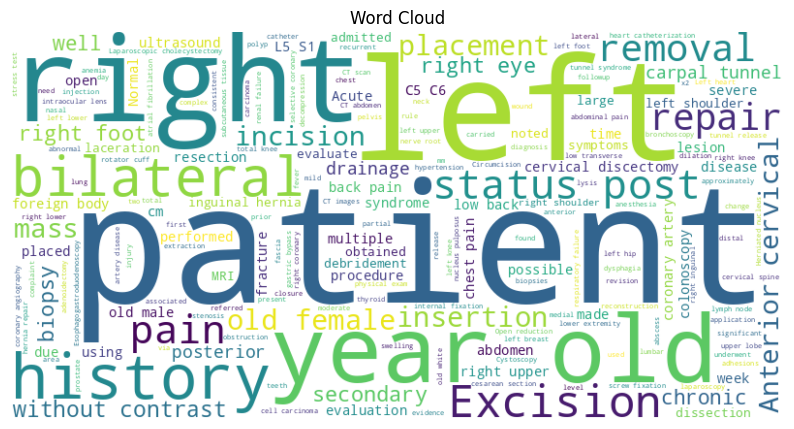

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/content/cleaned_file.csv')

# Combine all text data into a single string
text = ' '.join(df['description'].dropna())  # Replace 'description' with the column containing text data

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()


### Document-Term Matrix: Example

For many of the techniques we'll be using in future assignment, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's ` CountVectorizer `, where every row will represent a different document and every column will represent a different word.

In addition, with ` CountVectorizer `, we can remove stop words. Stop words are common words that add no additional meaning to text such as 'a', 'the', etc.

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your DataFrame is named df
# Replace 'transcription' with the actual column containing your text data
# Make sure to preprocess your text data if necessary

# Create CountVectorizer with English stop words excluded
cv = CountVectorizer(stop_words='english')

# Fit and transform the text data
data_cv = cv.fit_transform(df['transcription'])

# Convert the document-term matrix to a DataFrame
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# Set the index of the DataFrame
data_dtm.index = df.index

# Display the document-term matrix
print(data_dtm)


      00  000  0000000  000units  001  004  00am  00pm  01  013  ...  zuba  \
0      0    0        0         0    0    0     0     0   0    0  ...     0   
1      0    0        0         0    0    0     0     0   0    0  ...     0   
2      0    0        0         0    0    0     0     0   0    0  ...     0   
3      0    0        0         0    0    0     0     0   0    0  ...     0   
4      0    0        0         0    0    0     0     0   0    0  ...     0   
...   ..  ...      ...       ...  ...  ...   ...   ...  ..  ...  ...   ...   
4984   0    0        0         0    0    0     0     0   0    0  ...     0   
4985   0    1        0         0    0    0     0     0   0    0  ...     0   
4989   0    0        0         0    0    0     0     0   0    0  ...     0   
4993   0    0        0         0    0    0     0     0   0    0  ...     0   
4995   0    0        0         0    0    0     0     0   0    0  ...     0   

      zumi  zung  zygoma  zygomatic  zymar  zyprexa  zyrtec  zy

## Additional Assignments:

1. Can you add an additional regular expression to the clean_text_round2 function to further clean the text?
2. Play around with CountVectorizer's parameters. What is ngram_range? What is min_df and max_df?

In [30]:
import re

def clean_text_round2(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation (including apostrophes)
    text = re.sub(r'[^\w\s]', '', text)

    # Additional regular expression to remove specific pattern
    text = re.sub(r'\b\d+\b', '', text)  # Remove any standalone numbers

    return text

# Example usage:
cleaned_text = clean_text_round2("The price is $10.99, and it's available at https://example.com")
print(cleaned_text)


The price is  and its available at 


CountVectorizer Parameters

**1. ngram_range:**
ngram_range specifies the range of n-values for different n-grams to be extracted.
An n-gram is a contiguous sequence of n items (words, characters, etc.) from a given text.
It takes a tuple (min_n, max_n) where min_n is the minimum value of n and max_n is the maximum value of n.
For example, ngram_range=(1, 2) indicates that both unigrams (single words) and bigrams (pairs of consecutive words) will be considered.

**2. min_df:**
min_df specifies the minimum document frequency for a term to be included in the vocabulary.
A term must appear in at least min_df documents to be considered.
It can be specified as an integer (e.g., min_df=2, meaning the term must appear in at least 2 documents) or as a float between 0 and 1 (e.g., min_df=0.1, meaning the term must appear in at least 10% of the documents).

**3. max_df:**
max_df specifies the maximum document frequency for a term to be included in the vocabulary.
A term must appear in at most max_df documents to be considered.
It can be specified as an integer (e.g., max_df=100, meaning the term must appear in at most 100 documents) or as a float between 0 and 1 (e.g., max_df=0.9, meaning the term must appear in at most 90% of the documents).
By adjusting these parameters, you can control the size and content of the vocabulary created by CountVectorizer, which can have an impact on the performance of text classification or other natural language processing tasks.